In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os
import struct
from scipy import signal
import pywt
from math import sqrt

%pylab inline

pwd = os.getcwd()
fb = open(pwd + "//" + "input_data" + "//" + "train" + "//" + "100" + "//" + "1", "rb")
x = 0
data1 = []
data2 = []

interval = 5
dt = 0.0000001 * interval
fs = 10000000 / interval
start = int(250000 / interval)
end = int(350000 / interval)
fig_size = 20

while True:
    data = fb.read(4)
    if not data:
        break
    if x % interval == 0:
        ch1, ch2 = struct.unpack('<HH', data)
        ch1 = (float(ch1) - 8192) / 8192 * 2.5
        ch2 = (float(ch2) - 8192) / 8192 * 2.5
        ch1 = float(ch1)
        ch2 = float(ch2)
        data1.append(ch1)
        data2.append(ch2)
    x = x + 1

fb.close()

data1 = data1[start:end]
data2 = data2[start:end]

wavelet = 'morl'
c = pywt.central_frequency(wavelet)
fa = np.arange(400000, 20000 - 1, -20000)
scales = np.array(float(c)) * fs / np.array(fa)

[cfs1,frequencies1] = pywt.cwt(data1,scales,wavelet,dt)
[cfs2,frequencies2] = pywt.cwt(data2,scales,wavelet,dt)
power1 = (abs(cfs1)) ** 2
power2 = (abs(cfs2)) ** 2

length_now = len(power2[0])
power1 = np.reshape(power1,(len(power1),fig_size,int(length_now/fig_size)))
power2 = np.reshape(power2,(len(power2),fig_size,int(length_now/fig_size)))
power1 = np.log10(np.mean(power1,axis=2))
power2 = np.log10(np.mean(power2,axis=2))

mx = power1.max()
mn = power1.min()
power1 = (power1-mn) / (mx-mn)
power1 = power1.flatten()

mx = power2.max()
mn = power2.min()
power2 = (power2-mn) / (mx-mn)
power2 = power2.flatten()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sqrt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Restoring parameters from saver/SAE/SAE


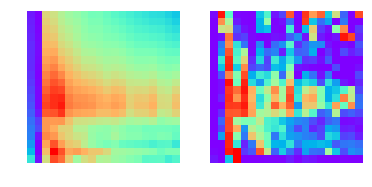

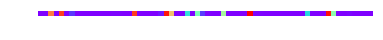

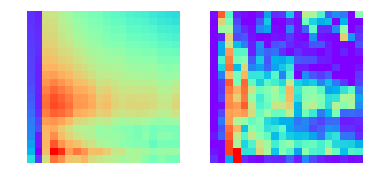

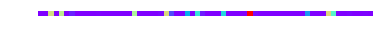

57.23013046961981 51.5281524990978


In [2]:
with tf.Session() as sess:  
    
    tf.local_variables_initializer().run()
    tf.global_variables_initializer().run()
    
    coord = tf.train.Coordinator()
    thread = tf.train.start_queue_runners(sess=sess,coord=coord)
    
    saver = tf.train.import_meta_graph('saver/SAE/SAE.meta')
    saver.restore(sess,'saver/SAE/SAE')  
    h = tf.get_collection('output_y')[0]
    y = tf.get_collection('output_y')[1]
    #l = tf.get_collection('output_y')[2]
    
    graph = tf.get_default_graph()
    x = graph.get_tensor_by_name("input_x:0")
    
    hidden1,outputdata1 = sess.run([h,y],feed_dict ={x:[power1]})
    hidden2,outputdata2 = sess.run([h,y],feed_dict ={x:[power2]})
    
    power1 = np.reshape(power1,(20,20))
    power2 = np.reshape(power2,(20,20))
    outputdata1 = np.reshape(outputdata1,(20,20))
    outputdata2 = np.reshape(outputdata2,(20,20))
    #hidden1 = np.reshape(hidden1,(8,8))
    #hidden2 = np.reshape(hidden2,(8,8))
    
    
    plt.subplot(1,2,1)
    plt.imshow(power1,cmap=plt.get_cmap('rainbow'))
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(outputdata1,cmap=plt.get_cmap('rainbow'))
    plt.axis('off')
    plt.figure()
    plt.imshow(hidden1,cmap=plt.get_cmap('rainbow'))
    plt.axis('off')
    plt.show()
    
    plt.subplot(1,2,1)
    plt.imshow(power2,cmap=plt.get_cmap('rainbow'))
    plt.axis('off')
    plt.subplot(1,2,2)
    plt.imshow(outputdata2,cmap=plt.get_cmap('rainbow'))
    plt.axis('off')
    plt.figure()
    plt.imshow(hidden2,cmap=plt.get_cmap('rainbow'))
    plt.axis('off')
    plt.show()
    
    loss1 = sum((power1 - outputdata1)**2)
    loss2 = sum((power2 - outputdata2)**2)
    print(loss1,loss2)
    
#    similar1 = 1 - loss1 * 10
#    similar2 = 1 - loss2 * 10
#    print(similar1,similar2)
    
#     power1 = power1.flatten()
#     power2 = power2.flatten()
#     outputdata1 = outputdata1.flatten()
#     outputdata2 = outputdata2.flatten()
#     power1_norm = sqrt((power1 ** 2).sum())
#     power2_norm = sqrt((power2 ** 2).sum())
#     outputdata1_norm = sqrt((outputdata1 ** 2).sum())
#     outputdata2_norm = sqrt((outputdata2 ** 2).sum())
#     p1o1 = (power1 * outputdata1).sum()
#     p2o2 = (power2 * outputdata2).sum()
#     cos1 = p1o1 / power1_norm / outputdata1_norm
#     cos2 = p2o2 / power2_norm / outputdata2_norm
#     print(cos1,cos2)
    
    #if loss1 > 2:
    #    loss1 = 2
    #if loss2 > 2:
    #    loss2 = 2
    #print("%d%%"%((2-loss1)*50),"%d%%"%((2-loss2)*50))
    
    
    coord.request_stop()
    coord.join(thread)

In [3]:
print(hidden1)

[[4.9871100e-24 8.4075599e-04 8.3515853e-01 3.0426527e-06 9.1304594e-01
  4.3947410e-04 7.3462307e-02 6.3393964e-03 7.4802514e-04 2.7885495e-03
  4.4456749e-07 1.8520842e-03 1.2530836e-06 3.6820842e-05 5.9378007e-03
  5.0701653e-03 2.2921721e-08 4.4265949e-08 9.1759342e-01 4.6849303e-04
  4.0606810e-05 3.5415948e-03 0.0000000e+00 3.0794572e-02 9.6592003e-01
  7.1871150e-01 9.1750435e-06 2.8765486e-05 3.4873116e-01 1.9149529e-29
  4.8794159e-01 7.6941364e-02 4.6953675e-03 4.1233747e-05 3.5615137e-03
  5.7321209e-01 1.1309776e-04 5.3122226e-04 6.1604995e-05 6.6309767e-05
  9.9444973e-01 6.1327945e-03 6.1854962e-03 1.6711431e-06 1.0219982e-06
  5.0025941e-05 3.5825851e-05 1.2207514e-04 4.1435423e-04 3.4085391e-38
  1.7080568e-04 3.2119560e-01 4.7919006e-05 0.0000000e+00 5.4265663e-05
  9.7408503e-01 5.2535313e-01 3.4620955e-03 1.1883869e-05 7.9903901e-03
  5.4629758e-04 1.7804974e-06 2.1007492e-03 2.9760653e-05]]
